In [1]:
import scale_space_extr_det as ssed

import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig

### Load test images


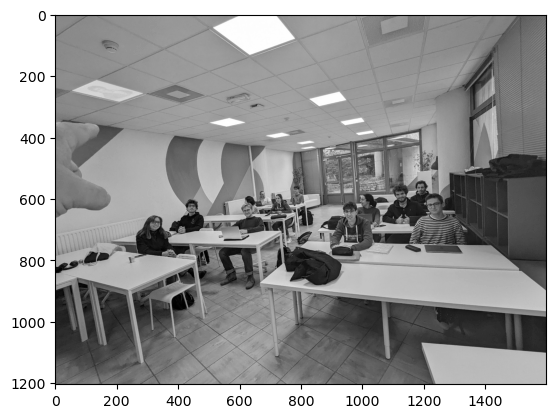

In [2]:
im1 = plt.imread("images/im1.jpg")

# convert to grayscale brutally
im1_gray = im1.mean(axis=2)

# show grayscale image
plt.imshow(im1_gray, cmap="gray")

### Gaussian Gradient


In [3]:
# create scale space
sigma = 1.6
sigmas = [sigma * k for k in range(1, 10)]
# do not specify size, therefore size is chosen automatically
gaussians = [ssed.gaussian_kernel2D(sigma0) for sigma0 in sigmas]

In [4]:
print("sigmas", sigmas)

sigmas [1.6, 3.2, 4.800000000000001, 6.4, 8.0, 9.600000000000001, 11.200000000000001, 12.8, 14.4]


In [5]:
# compute gaussian convolutions
# use mode="same" therefore accepting boarder effects
convolved_ims = [
    sig.fftconvolve(im1_gray, gaussian, mode="same") for gaussian in gaussians
]

In [6]:
# show shape of original image
print(im1_gray.shape)

# show shape of convolved images
for convolved_im in convolved_ims:
    print(convolved_im.shape)

(1204, 1600)
(1204, 1600)
(1204, 1600)
(1204, 1600)
(1204, 1600)
(1204, 1600)
(1204, 1600)
(1204, 1600)
(1204, 1600)
(1204, 1600)


Different shapes is weird with mode="same"


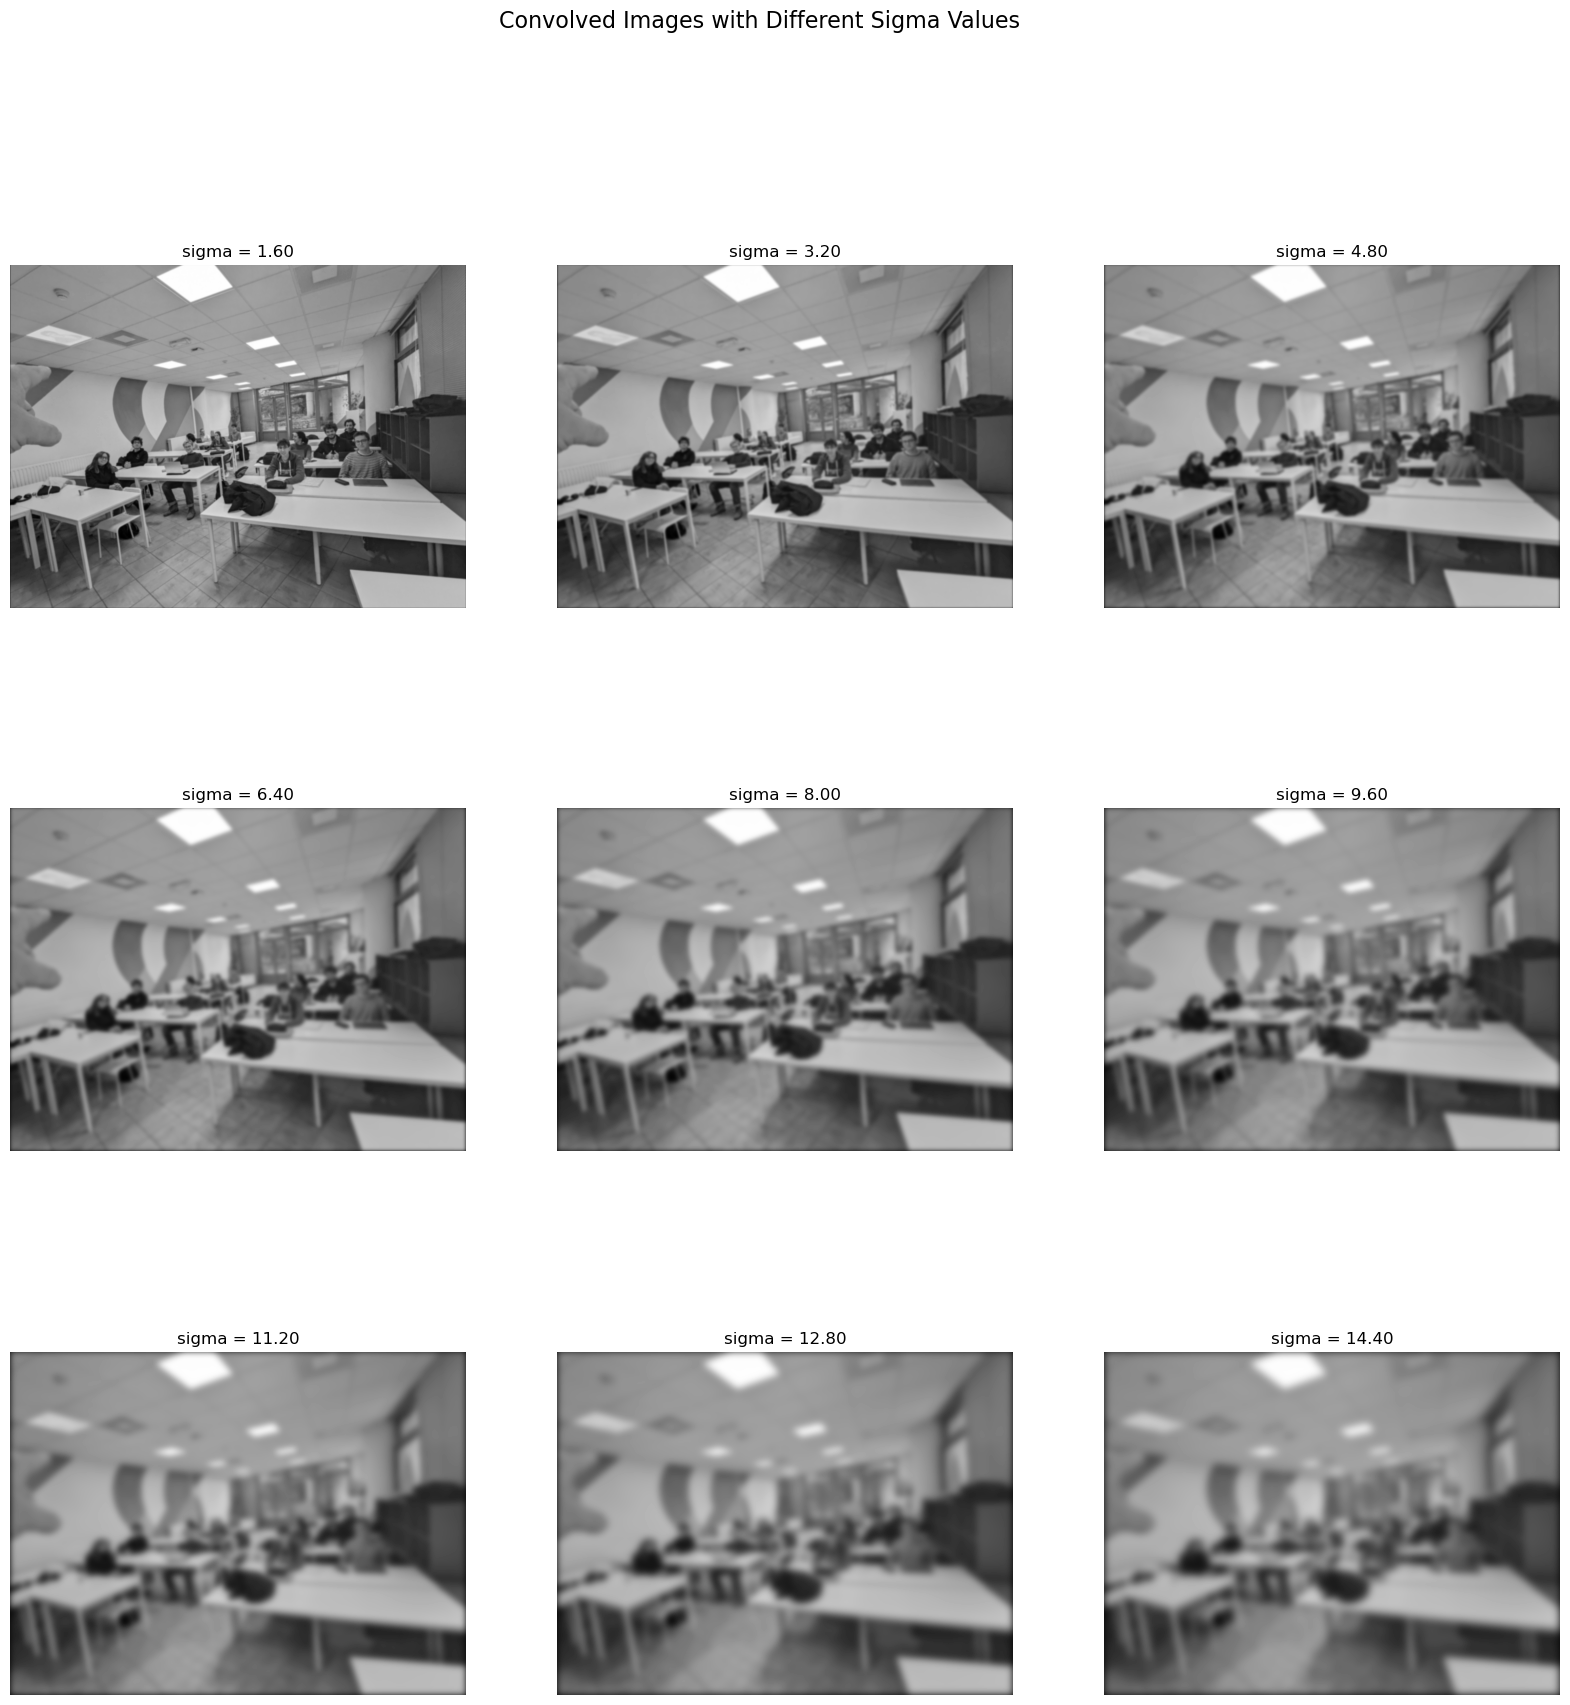

In [7]:
# show convolved images
l = len(sigmas)
fig_size = int(np.ceil(np.sqrt(l)))
fig, axs = plt.subplots(fig_size, fig_size, figsize=(20, 20))
for i in range(l):
    axs[i // int(fig_size), i % int(fig_size)].imshow(
        convolved_ims[i], cmap="gray", vmin=0, vmax=255
    )
    axs[i // int(fig_size), i % int(fig_size)].set_title(f"sigma = {sigmas[i]:.2f}")
    axs[i // int(fig_size), i % int(fig_size)].axis("off")

# Add a title to the entire figure
fig.suptitle("Convolved Images with Different Sigma Values", fontsize=16)

plt.show()

Compute difference of gaussians


In [8]:
# 0 padd the convolution to the shape of the last convolution
def pad_images(images):
    # Get the shape of the last image
    target_shape = images[-1].shape

    # Initialize a list to store the padded images
    padded_images = []

    # Iterate through each image and pad it
    for img in images:
        # Calculate the amount of padding needed on each side
        pad_width = [
            (0, target_shape[i] - img.shape[i]) for i in range(len(target_shape))
        ]

        # Pad the image with zeros
        padded_img = np.pad(img, pad_width, mode="constant", constant_values=0)

        # Add the padded image to the list
        padded_images.append(padded_img)

    return padded_images


padd_convolved_ims = pad_images(convolved_ims)

In [9]:
# print shape of padded images
for padd_convolved_im in padd_convolved_ims:
    print(padd_convolved_im.shape)

(1204, 1600)
(1204, 1600)
(1204, 1600)
(1204, 1600)
(1204, 1600)
(1204, 1600)
(1204, 1600)
(1204, 1600)
(1204, 1600)


In [12]:
diff_of_gauss = [
    padd_convolved_ims[i] - padd_convolved_ims[i - 1]
    for i in range(1, len(padd_convolved_ims))
]

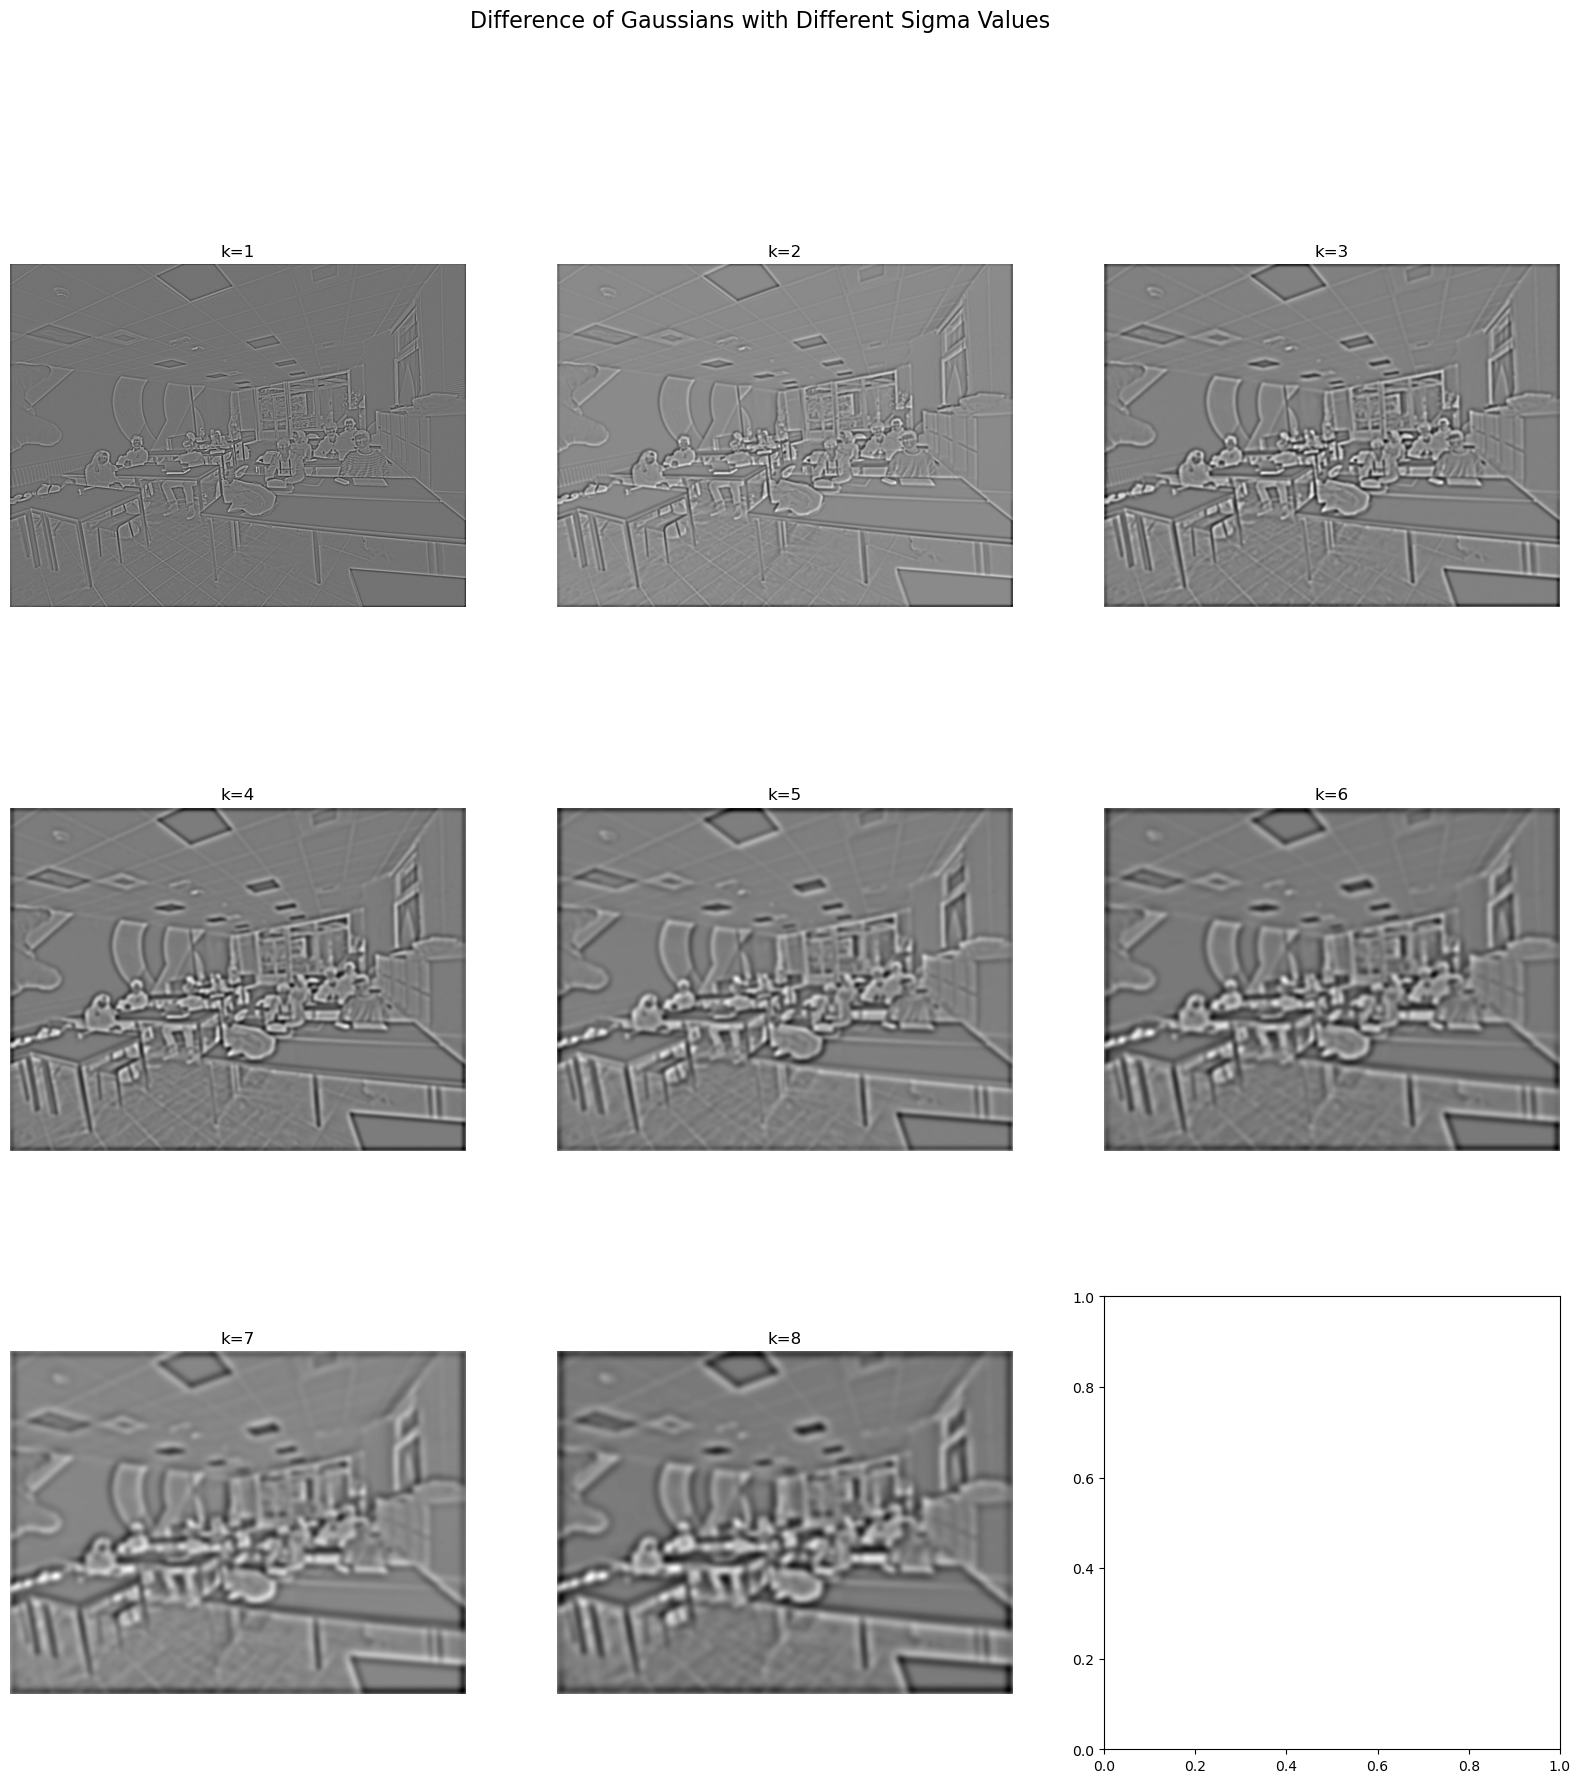

In [15]:
# show differences of gaussians
# we do not precise the vmin and vmax of the grayscale colormap
l = len(diff_of_gauss)
fig_size = int(np.ceil(np.sqrt(l)))
fig, axs = plt.subplots(fig_size, fig_size, figsize=(20, 20))
for i in range(l):
    axs[i // int(fig_size), i % int(fig_size)].imshow(
        diff_of_gauss[i],
        cmap="gray",
    )
    axs[i // int(fig_size), i % int(fig_size)].set_title(f"k={i+1}")
    axs[i // int(fig_size), i % int(fig_size)].axis("off")

# Add a title to the entire figure
fig.suptitle("Difference of Gaussians with Different Sigma Values", fontsize=16)

plt.show()